<a href="https://colab.research.google.com/github/DrMelissaFranklin/DrMelissaFranklin/blob/main/Mel_HousingD_Oct20_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Harbinger
Project 2: Housing Price Prediction
The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class. The goal is to minimize the RMS percentage error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.

Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.

Be sure to go through the whole data science process and document as such in your Jupyter notebook.

This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around. We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.

A data dictionary file is available at AWS S3 at Housing Data Dictionary.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .

Use the grading rubric and the Project Blank. Refer to Project 1 -- but no accuracy or confusion matrices...

Drop the unneeded columns as you see fit. [Start with small number, add in more? like the numpy 8 lec?]. given a data dictionary: do not trust it! verify it with value counts / nunique (no unknowns, 9999, strings of words)

pandas, head info describe etc

# Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

The goal is to take passenger information based on ticket records for the Titanic and predict whether or not a passenger would have survived.  This is a binary classification problem since each passenger either survived or didn't survive.  This project will use Naive Bayes classification.  

# Data Collection/Sources


### Tools are imported that can facilitate this project.

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

### Import the dataset from AWS collections as a csv file, convert it to a dataframe and check the head.

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"
homes_df = pd.read_csv( url )
homes_df.head()
#81 columns indicates a large number of independent variables.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [3]:
homes_df.tail()
#Check to see if the tail end of the data table looks consistent with the head, and it does.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


## Getting to know the data.


In [4]:
homes_df.shape

(2637, 81)

### This is a large dataset with 81 columns and 2637 rows with mixed datatypes containing object, integers and floats, and is taking up 1.6+ mb

In [5]:
homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [6]:
categorical_cols = homes_df.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)
print(f"Number of categorical columns: {num_categorical_cols}")

Number of categorical columns: 43


### Of the 81 data columns about half, 43, are categorical.

In [7]:
for col in categorical_cols:
    sub_categories = homes_df[col].nunique()
    print(f" Feature column named '{col}' has {sub_categories} sub-categories.")

 Feature column named 'MS Zoning' has 7 sub-categories.
 Feature column named 'Street' has 2 sub-categories.
 Feature column named 'Alley' has 2 sub-categories.
 Feature column named 'Lot Shape' has 4 sub-categories.
 Feature column named 'Land Contour' has 4 sub-categories.
 Feature column named 'Utilities' has 3 sub-categories.
 Feature column named 'Lot Config' has 5 sub-categories.
 Feature column named 'Land Slope' has 3 sub-categories.
 Feature column named 'Neighborhood' has 28 sub-categories.
 Feature column named 'Condition 1' has 9 sub-categories.
 Feature column named 'Condition 2' has 8 sub-categories.
 Feature column named 'Bldg Type' has 5 sub-categories.
 Feature column named 'House Style' has 8 sub-categories.
 Feature column named 'Roof Style' has 6 sub-categories.
 Feature column named 'Roof Matl' has 8 sub-categories.
 Feature column named 'Exterior 1st' has 16 sub-categories.
 Feature column named 'Exterior 2nd' has 17 sub-categories.
 Feature column named 'Mas Vnr 

### Of the 43 categorical columns, all of them have sub-categories, so the data is also quite complex.

### What are the counts for the Categories shown with their SubCategories?

In [8]:
# Get categorical columns
categorical_cols = homes_df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for col in categorical_cols:
    print(f"\nValue counts for column '{col}':")

    # Get value counts for each category within the column
    value_counts_series = homes_df[col].value_counts()

    # Print the value counts
    print(value_counts_series)


Value counts for column 'MS Zoning':
MS Zoning
RL         2043
RM          419
FV          123
C (all)      25
RH           23
I (all)       2
A (agr)       2
Name: count, dtype: int64

Value counts for column 'Street':
Street
Pave    2625
Grvl      12
Name: count, dtype: int64

Value counts for column 'Alley':
Alley
Grvl    111
Pave     69
Name: count, dtype: int64

Value counts for column 'Lot Shape':
Lot Shape
Reg    1662
IR1     895
IR2      65
IR3      15
Name: count, dtype: int64

Value counts for column 'Land Contour':
Land Contour
Lvl    2365
HLS     111
Bnk     106
Low      55
Name: count, dtype: int64

Value counts for column 'Utilities':
Utilities
AllPub    2634
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

Value counts for column 'Lot Config':
Lot Config
Inside     1924
Corner      459
CulDSac     160
FR2          81
FR3          13
Name: count, dtype: int64

Value counts for column 'Land Slope':
Land Slope
Gtl    2511
Mod     112
Sev      14
Name: count, dtype:

### How many numerical columns total, and how many of each datatype, integer or float, and what are their identifying names?

In [9]:
# Get numerical columns (integer and float)
numerical_features = homes_df.select_dtypes(include=['int64', 'float']).columns

# Separate integer and float columns
int_cols = homes_df[numerical_features].select_dtypes(include=['int64']).columns
float_cols = homes_df[numerical_features].select_dtypes(include=['float']).columns

# Count and print results
print("Integer Columns:")
print(int_cols.tolist())  # Convert Index to list for better printing
print(f"Total Integer Columns: {len(int_cols)}\n")

print("Float Columns:")
print(float_cols.tolist())  # Convert Index to list for better printing
print(f"Total Float Columns: {len(float_cols)}\n")

print(f"Total Numerical Columns: {len(numerical_features)}")

Integer Columns:
['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Total Integer Columns: 27

Float Columns:
['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
Total Float Columns: 11

Total Numerical Columns: 38


### A basic description of the numerical data columns.

In [10]:
homes_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


### Is there any missing data?

In [11]:
homes_df.isnull().sum()
# Results indicate there is missing data:

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


### How many of the 81 total columns have missing data (nulls) and what is the percentage per column?

In [12]:
# Find columns with nulls
cols_with_nulls = homes_df.columns[homes_df.isnull().any()].tolist()
num_cols_with_nulls = len(cols_with_nulls)

# Print the total count of columns with nulls
print(f"Here are {num_cols_with_nulls} columns with null values:")

# Create a dictionary to store null percentages
null_percentages = {}
for col in cols_with_nulls:
    null_percentage = (homes_df[col].isnull().sum() / len(homes_df)) * 100
    null_percentages[col] = null_percentage

# Sort the dictionary by values (null percentages) in descending order
# and reverse the order using reversed()
sorted_null_percentages = dict(reversed(sorted(null_percentages.items(), key=lambda item: item[1])))

# Print the results
for col, null_percentage in sorted_null_percentages.items():
    print(f"{null_percentage:.2f}% nulls in '{col}'")

Here are 26 columns with null values:
99.58% nulls in 'Pool QC'
96.36% nulls in 'Misc Feature'
93.17% nulls in 'Alley'
79.98% nulls in 'Fence'
60.94% nulls in 'Mas Vnr Type'
48.69% nulls in 'Fireplace Qu'
17.03% nulls in 'Lot Frontage'
5.57% nulls in 'Garage Cond'
5.57% nulls in 'Garage Qual'
5.57% nulls in 'Garage Finish'
5.57% nulls in 'Garage Yr Blt'
5.50% nulls in 'Garage Type'
2.88% nulls in 'Bsmt Exposure'
2.81% nulls in 'BsmtFin Type 2'
2.77% nulls in 'BsmtFin Type 1'
2.77% nulls in 'Bsmt Cond'
2.77% nulls in 'Bsmt Qual'
0.87% nulls in 'Mas Vnr Area'
0.08% nulls in 'Bsmt Half Bath'
0.08% nulls in 'Bsmt Full Bath'
0.04% nulls in 'Garage Area'
0.04% nulls in 'Garage Cars'
0.04% nulls in 'Total Bsmt SF'
0.04% nulls in 'Bsmt Unf SF'
0.04% nulls in 'BsmtFin SF 2'
0.04% nulls in 'BsmtFin SF 1'


### There are 26 columns with nulls. Because there is a jump at 6% in the percentage of nulls, which columns have more than 6% nulls and are numerical?  Consider dropping these columns, especially if they are numerical.

In [13]:
# Create a list to store null data
null_list = []

# Iterate through columns with nulls to find datatype (numerical / categorical) and those with greater than 6% nulls
for col in cols_with_nulls:
    null_percentage = (homes_df[col].isnull().sum() / len(homes_df)) * 100
    col_type = "Numerical" if homes_df[col].dtype in [np.number] else "Categorical"
    above_threshold = null_percentage > 6

    null_list.append([col, col_type, above_threshold])

# Create a pandas DataFrame from the list because dataframes form tabular data in a Table form that is easy to read and manipulate.
null_df = pd.DataFrame(null_list, columns=["Column Name", "Data Type", "More than 6% Nulls"])

# Select only the rows from the dataframe that are in a slice, or column, that is called 'more than 6% nulls'
null_df_table = null_df[null_df["More than 6% Nulls"]]

# Print the filtered data as a mini-table (actually just a dataframe)
print(null_df_table)

     Column Name    Data Type  More than 6% Nulls
0   Lot Frontage    Numerical                True
1          Alley  Categorical                True
2   Mas Vnr Type  Categorical                True
15  Fireplace Qu  Categorical                True
23       Pool QC  Categorical                True
24         Fence  Categorical                True
25  Misc Feature  Categorical                True


<ipython-input-13-d9c67e2721c0>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  col_type = "Numerical" if homes_df[col].dtype in [np.number] else "Categorical"


### 'Lot Frontage' is the only numerical column with more than 6% nulls, about 17%.  

### DROP 'Lot Frontage' before the first model fit.  Consider adding Lot Frontage back if highly correlated, and replacing the nulls with the mean.

### Note: Of the 26 columns with null values, 6 categorical columns have more than 6% nulls, and may be well-suited for a Join into the Miscellaneous column, depending on how strongly each is correlated to Sales Price and whether the nature of the category can be sensibly captured in a Join or Merge with Miscellaneous.  

# For the numeric features below 1% nulls, drop the nulls.

# For the numeric features between 1-6% nulls, consider replacing the nulls with the mean for strongly correlated columns.

### What are the numerical features remaining that have 1% or lower nulls, as candidates for dropping their rows with nulls?

0.87% nulls in Mas Vnr Area'

0.08% nulls in 'Bsmt Half Bath'

0.08% nulls in 'Bsmt Full Bath'

0.04% nulls in 'Garage Area'

0.04% nulls in 'Garage Cars'

0.04% nulls in 'Total Bsmt SF'

0.04% nulls in 'Bsmt Unf SF'

0.04% nulls in 'BsmtFin SF 2'

0.04% nulls in 'BsmtFin SF 1'

##DROP the Nulls in the numerical columns that contain less than 1% nulls.

In [14]:
# Calculate null percentages for all columns
null_percentages = homes_df.isnull().sum() / len(homes_df) * 100

# Get numerical features with less than 1% nulls
num_features_below_1_percent = null_percentages[(null_percentages <= 1) & (null_percentages > 0)].index

# Drop the nulls for numerical features with 1% or less nulls
for i in num_features_below_1_percent:
  if homes_df[i].dtype in [np.number]:  # Check if the feature is numerical
    homes_df = homes_df.dropna(subset=[i])

#Check to see if there are any nulls
# Print this outside the loop to always execute
print(f"Nulls remaining are: {homes_df[i].isnull().sum()}")

<ipython-input-14-abc1b8f929b1>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if homes_df[i].dtype in [np.number]:  # Check if the feature is numerical
<ipython-input-14-abc1b8f929b1>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if homes_df[i].dtype in [np.number]:  # Check if the feature is numerical
<ipython-input-14-abc1b8f929b1>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if homes_df[i].dtype in [np.number]:  # Check if the feature is numerical
<ipython-input-14-abc1b8f929b1>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if homes_df[i].dtype in [np.nu

Nulls remaining are: 0


<ipython-input-14-abc1b8f929b1>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if homes_df[i].dtype in [np.number]:  # Check if the feature is numerical


In [15]:
homes_df.shape

(2611, 81)

In [16]:
homes_df1 = homes_df.copy()
homes_df1.shape

(2611, 81)

In [17]:
# Confirm the columns with nulls below 1% are gone
cols_with_nulls = homes_df1.columns[homes_df1.isnull().any()].tolist()
num_cols_with_nulls = len(cols_with_nulls)

# Print the total count of columns with nulls
print(f"Here are {num_cols_with_nulls} columns with null values:")

# Create a dictionary to store null percentages
null_percentages = {}
for col in cols_with_nulls:
    null_percentage = (homes_df1[col].isnull().sum() / len(homes_df1)) * 100
    null_percentages[col] = null_percentage

# Sort the dictionary by values (null percentages) in descending order
# and reverse the order using reversed()
sorted_null_percentages = dict(reversed(sorted(null_percentages.items(), key=lambda item: item[1])))

# Print the results
for col, null_percentage in sorted_null_percentages.items():
    print(f"{null_percentage:.2f}% nulls in '{col}'")

Here are 17 columns with null values:
99.58% nulls in 'Pool QC'
96.32% nulls in 'Misc Feature'
93.18% nulls in 'Alley'
79.85% nulls in 'Fence'
60.55% nulls in 'Mas Vnr Type'
48.76% nulls in 'Fireplace Qu'
16.97% nulls in 'Lot Frontage'
5.55% nulls in 'Garage Cond'
5.55% nulls in 'Garage Qual'
5.55% nulls in 'Garage Finish'
5.55% nulls in 'Garage Yr Blt'
5.52% nulls in 'Garage Type'
2.83% nulls in 'Bsmt Exposure'
2.76% nulls in 'BsmtFin Type 2'
2.72% nulls in 'BsmtFin Type 1'
2.72% nulls in 'Bsmt Cond'
2.72% nulls in 'Bsmt Qual'


For numeric columns that have more than 1% nulls and less than 6%, replace the nulls with the mean, justified by the Central Limit Theorem.

In [18]:
# Calculate null percentages for all columns
null_percentages = homes_df1.isnull().sum() / len(homes_df1) * 100

# Filter numerical features with null percentages between 1% and 6%
num_features_to_impute = null_percentages[
    (null_percentages > 1) & (null_percentages < 6) & (homes_df1.dtypes.apply(lambda x: np.issubdtype(x, np.number)))
].index

# Impute with mean for the selected numerical features
for col in num_features_to_impute:
    homes_df1[col] = homes_df1[col].fillna(homes_df1[col].mean())

# Check for remaining nulls in num_features_to_impute
nulls_remaining = homes_df1[num_features_to_impute].isnull().sum().sum()

print(f"Total nulls remaining in num_features_to_impute: {nulls_remaining}")

Total nulls remaining in num_features_to_impute: 0


In [19]:
#Check for null in numerical_features
null_percentages = homes_df1.isnull().sum() / len(homes_df1) * 100
numerical_null_percentages = null_percentages[
    (null_percentages > 0) & (homes_df1.dtypes.apply(lambda x: np.issubdtype(x, np.number)))
]
print(numerical_null_percentages)

Lot Frontage    16.966679
dtype: float64


## Search for numerical columns that may be serving as unique identifiers.

In [20]:
numerical_features = homes_df.select_dtypes(include=[np.number])

# Calculate unique values for each numerical column
unique_counts = numerical_features.nunique()

print("Shape of homes_df:", homes_df.shape)
print(unique_counts)

Shape of homes_df: (2611, 81)
PID                2611
MS SubClass          16
Lot Frontage        125
Lot Area           1782
Overall Qual         10
Overall Cond          9
Year Built          118
Year Remod/Add       61
Mas Vnr Area        425
BsmtFin SF 1        930
BsmtFin SF 2        252
Bsmt Unf SF        1076
Total Bsmt SF       994
1st Flr SF         1015
2nd Flr SF          585
Low Qual Fin SF      31
Gr Liv Area        1206
Bsmt Full Bath        4
Bsmt Half Bath        3
Full Bath             5
Half Bath             3
Bedroom AbvGr         7
Kitchen AbvGr         4
TotRms AbvGrd        12
Fireplaces            5
Garage Yr Blt       101
Garage Cars           6
Garage Area         574
Wood Deck SF        367
Open Porch SF       236
Enclosed Porch      174
3Ssn Porch           26
Screen Porch        115
Pool Area            12
Misc Val             35
Mo Sold              12
Yr Sold               5
SalePrice           969
dtype: int64


### Drop "PID" as an identifier that is not useful to our computations, and print the names of the columns to confirm PID is dropped.


In [21]:
homes_df1 = homes_df.drop(columns=['PID'])
print(homes_df1.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

## Exploratory Data Analysis


In [22]:
homes_df2 = homes_df1.copy()
homes_df2.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [23]:
#Delete 'Lot Frontage' from in the first pass, as it was found to have 17% nulles.  We can replace nulls in the 'Lot Frontage' with its mean later....
homes_df3 = homes_df2.drop(columns=['Lot Frontage'])
homes_df3.head()

,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,90,RL,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,50,RM,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,60,FV,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,70,RL,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


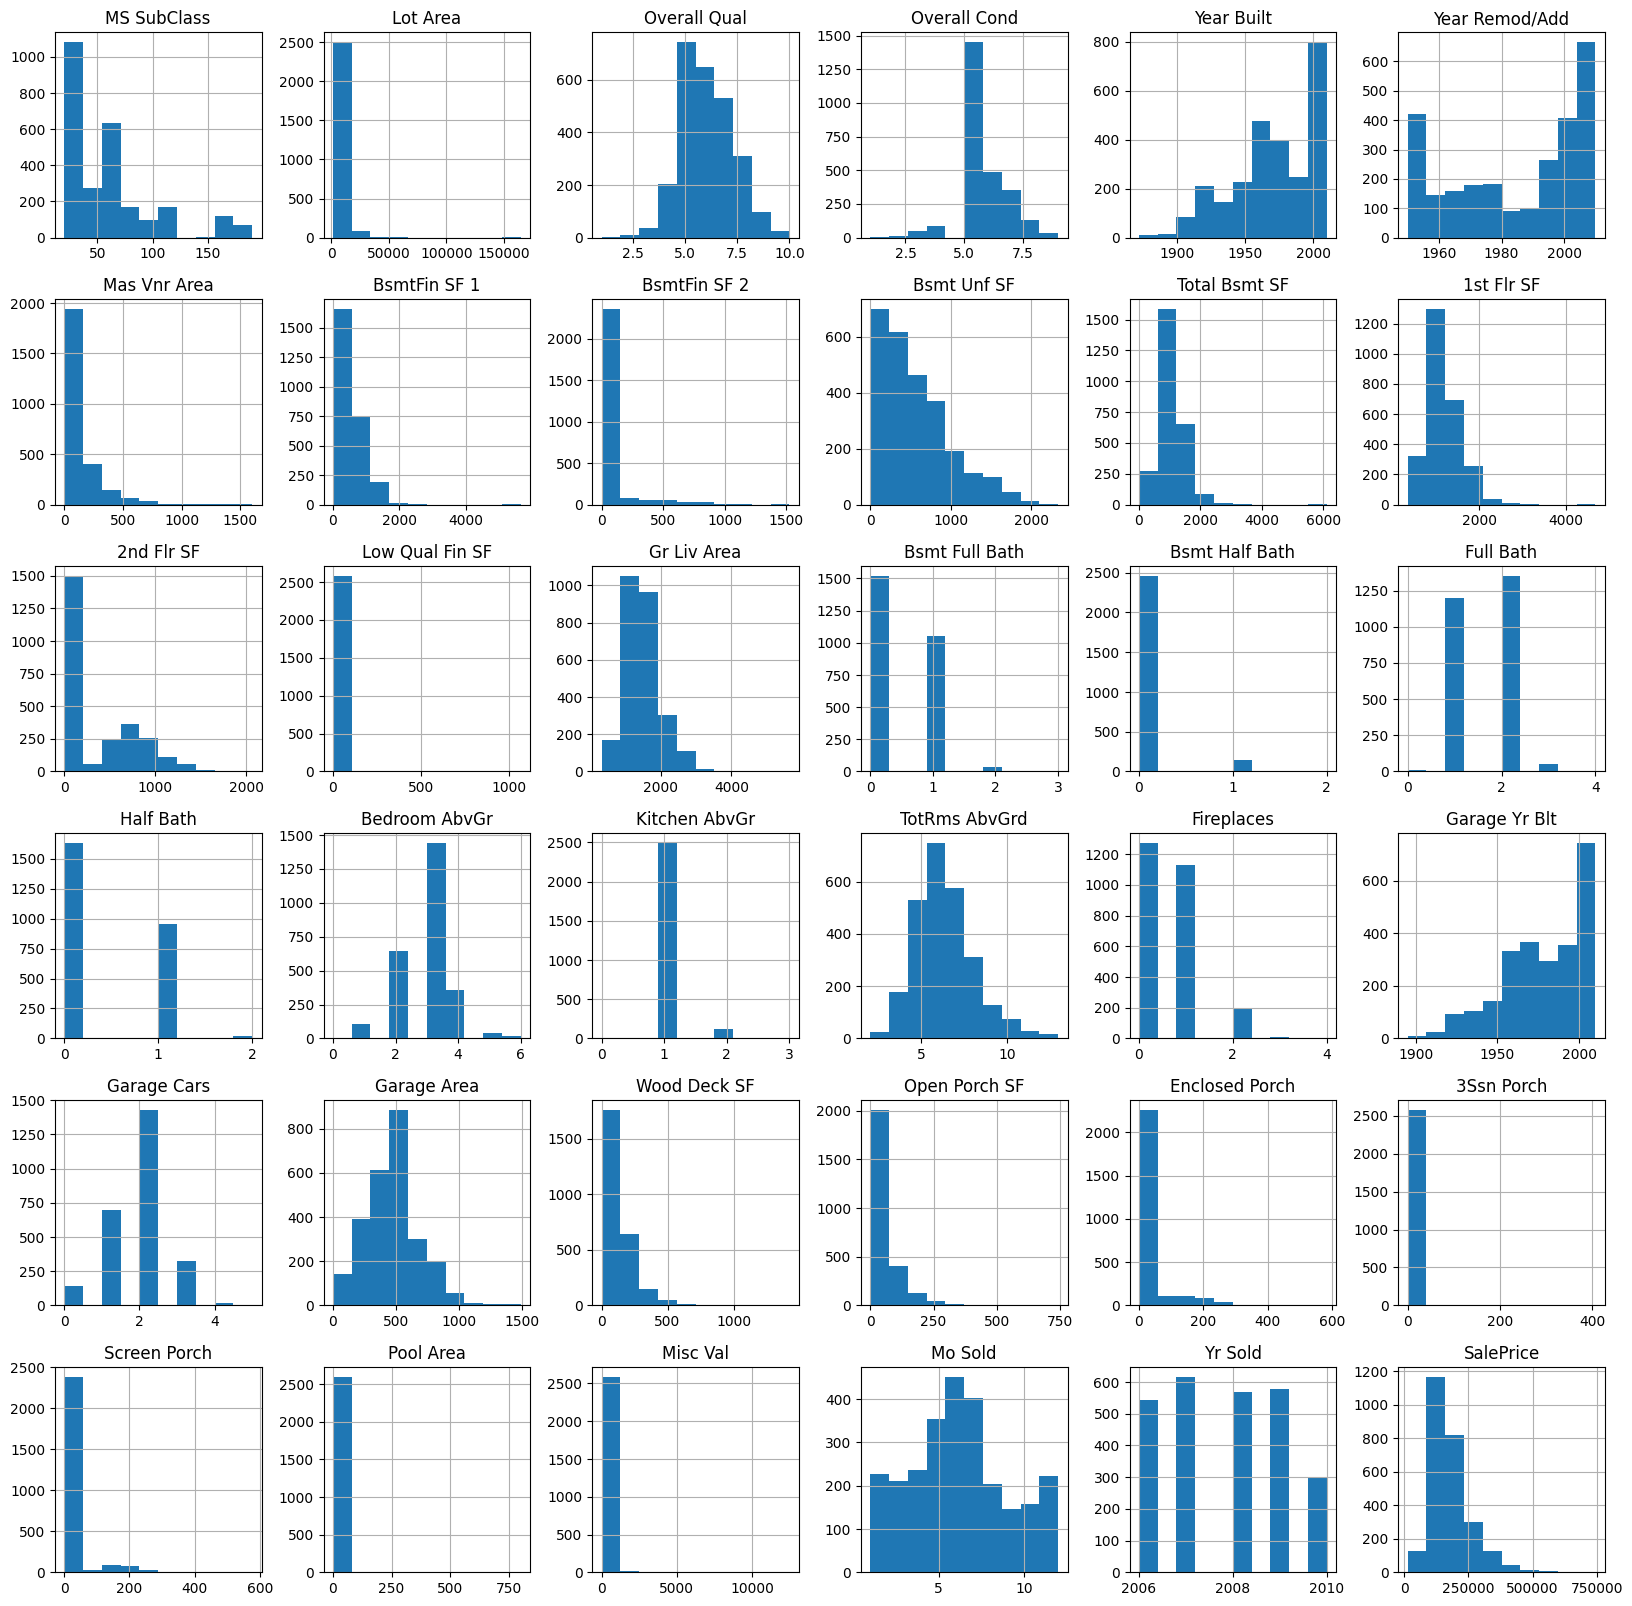

In [24]:
# Find all columns with numbers and print their histograms
# Assuming you have a DataFrame named 'df'
numerical_features = homes_df3.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(20, 20))  # Adjust figsize for larger plots
plt.show()


### The histograms show both normal and some non-normal distributions for numerical features.  



### What are the strongest correlates of 'Sales Price' for only the numerical features?

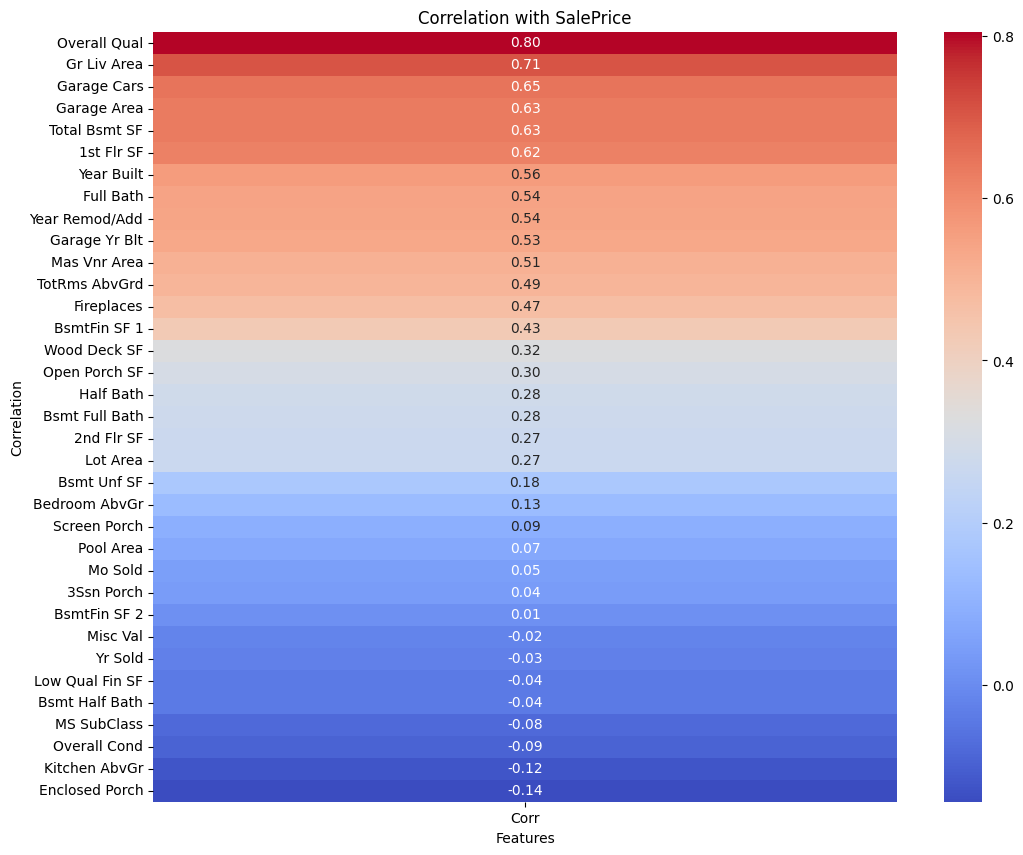

In [25]:
# Correlation strength for numerical data
y = homes_df3['SalePrice']
# select all columns from numerical_features EXCEPT 'SalePrice'
X = numerical_features[[col for col in numerical_features.columns if col != 'SalePrice']]
Corr_matrix = X.corrwith(y).to_frame(name='Corr')

#Sort the Corr_matrix in place.
Corr_matrix.sort_values(by='Corr', ascending=False, inplace=True)

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap using the sorted Corr_matrix
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()

In [26]:
#What are the strongest predictors of Sales Price? Correlations greater than .3

corr_num_Sales = numerical_features.corr()['SalePrice'].abs().sort_values(ascending = False)
pred = corr_num_Sales[(corr_num_Sales>.3) & (corr_num_Sales <1)]
pred

# making sure there are no nulls left
homes_df3.isnull().sum().sum()

13570

### There are several strong correlates greater than .2-.3 in the table of numerical features that are likely to be good predictors of Sales Price.

### What is the scatterplot of their distribution?

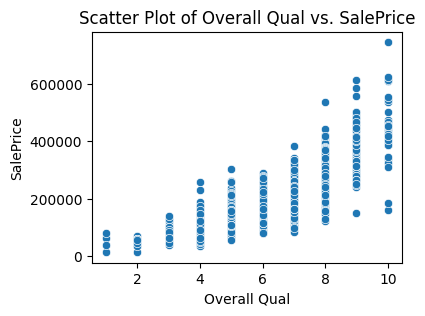

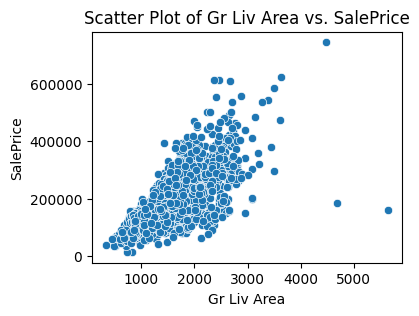

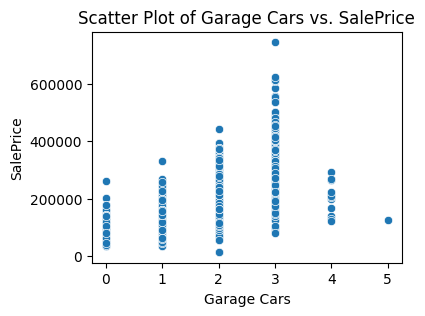

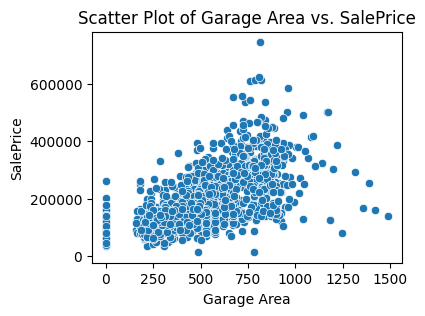

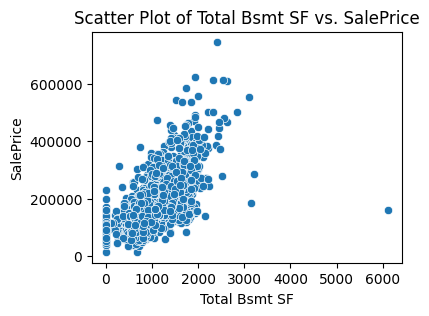

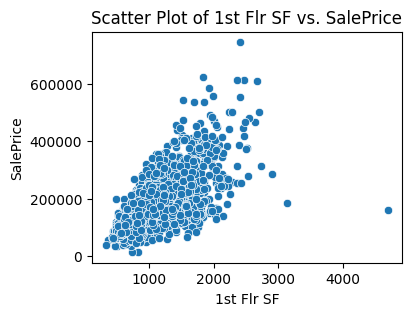

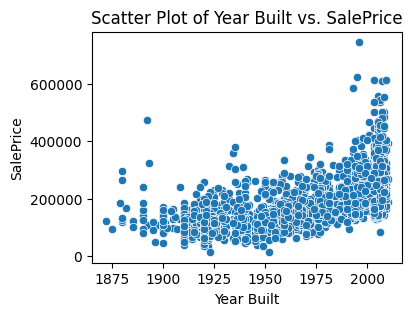

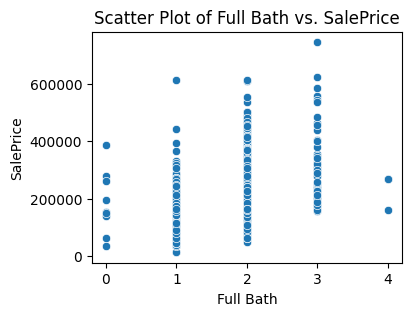

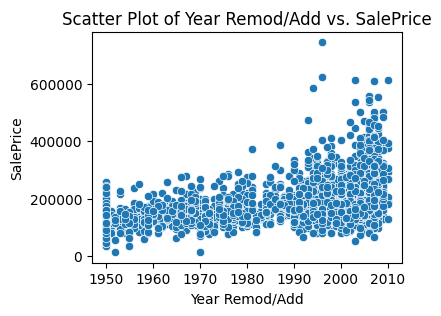

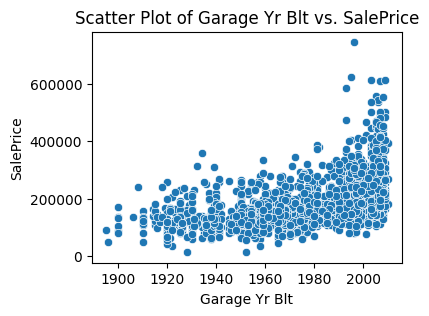

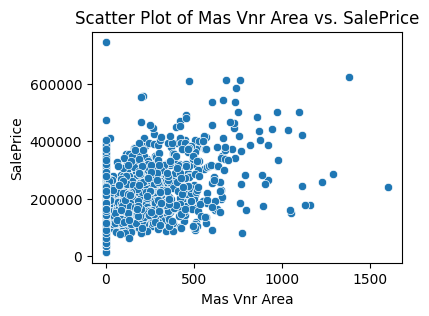

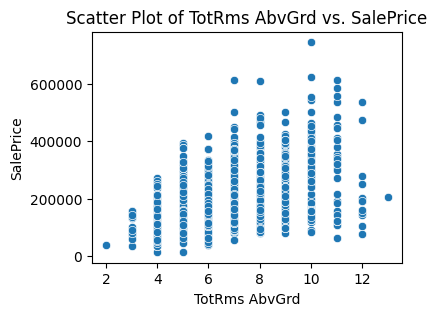

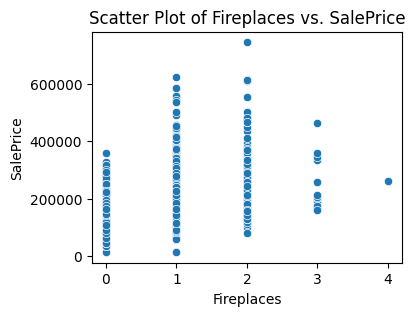

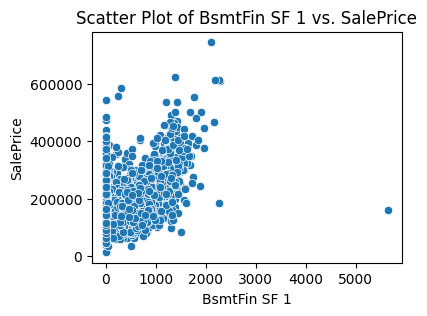

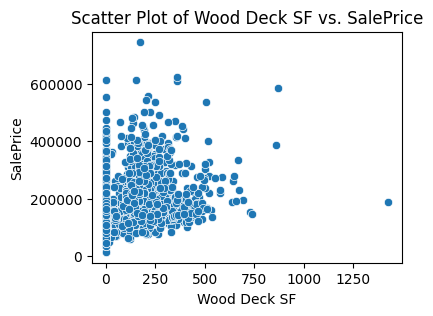

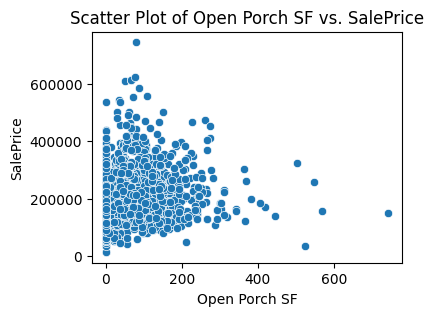

In [27]:
for num_feature in pred.index:  # Iterate through the features in 'pred'
    plt.figure(figsize=(4,3))  # Adjust figure size if needed
    sns.scatterplot(x= num_feature, y='SalePrice', data=homes_df3)
    plt.title(f'Scatter Plot of {num_feature} vs. SalePrice')
    plt.xlabel(num_feature)
    plt.ylabel('SalePrice')
    plt.show()

### There may be some non-linearity in the data.  Note: this data is not scaled.

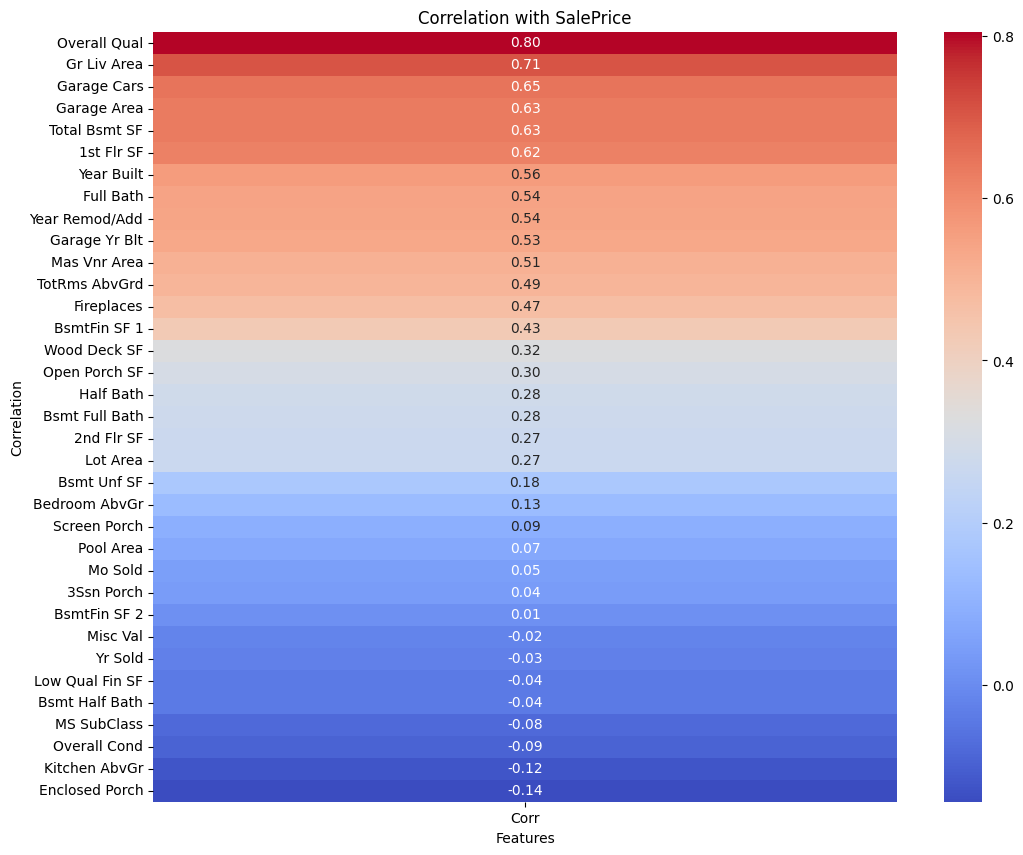

In [28]:
# Correlation Matrix heat map to show all strongest to weakest correlates with 'Sales Price'
Corr_matrix_sorted = Corr_matrix.sort_values(by='Corr', ascending=False)

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(Corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()

### What does the Sales Price distribution look like?

count      2611.000000
mean     179525.874761
std       78191.558766
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      212400.000000
max      745000.000000
Name: SalePrice, dtype: float64


<ipython-input-29-5a6cb09f6654>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homes_df3['SalePrice'])


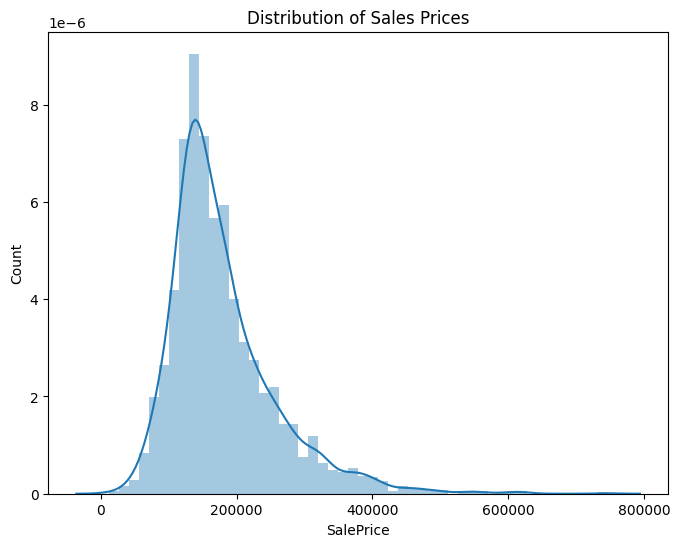

In [29]:
#Describe basic stats for Sales Price
print(homes_df3['SalePrice'].describe())

#Plot Sales Price as a histogram
plt.figure(figsize = (8,6))
sns.distplot(homes_df3['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Distribution of Sales Prices')
plt.show()

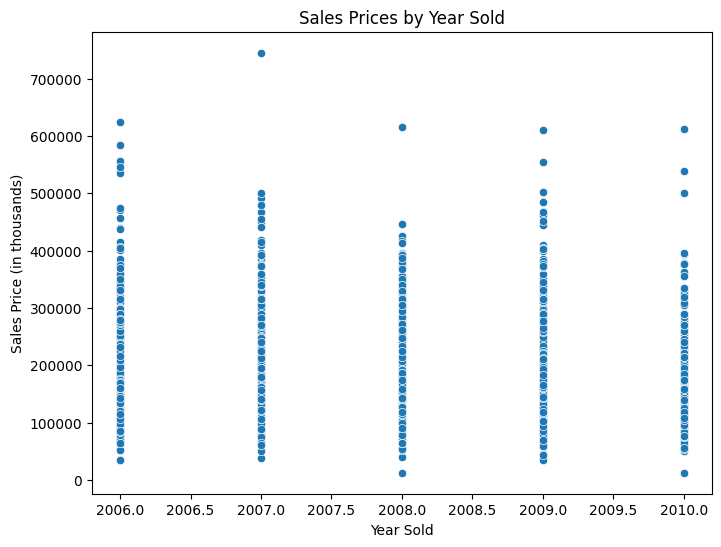

In [30]:
#Plot Sales Price as a scatter plot for Year Sold.

plt.figure(figsize = (8,6))
sns.scatterplot(x = homes_df3['Yr Sold'], y = homes_df3['SalePrice'])
plt.xlabel('Year Sold')
plt.ylabel("Sales Price (in thousands)") ;
plt.title('Sales Prices by Year Sold')
plt.show()

#Eyeballing the discrete data for year sold shows no obvious trend

In [31]:
homes_df4 = homes_df3.copy()
homes_df4.head()

,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,90,RL,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,50,RM,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,60,FV,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,70,RL,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


## Linear Regression with Statmodel


In [32]:
# First we will break up our data into training and testing sets
X = homes_df4.drop('SalePrice', axis = 1).copy() #copy features into X
X = sm.add_constant(X)
y = homes_df4['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Data Visualization/Communication of Results


In [ ]:
# Hans Rosling dots moving across years to show changes in Housing Market
# Error changes with each model to demonstrate confidence in market predictions

In [ ]:
# @title Future Directions

# Make a copy of original dataframe 'homes_df':
# homes_df_Z = homes_df.copy

# Filter columns with > 10% nulls:
# columns_to_Misc = null_percentage[null_percentage > 0.10].index.tolist()

#Moves columns with nulls > 10% to 'Misc Feature':
# If 'Misc' is not in columns_to_Misc, add it
# if 'Misc' not in columns_to_Misc:
#    columns_to_Misc.append('Misc')

# Merge selected columns into 'Misc':  this will move across columns per row and put diff columns within the same row into a single string in the 'Misc' column for that specific row -- resulting in multiple values across different columns for a single row.  HOT-ENCODE column names and with features in the Misc column, check the data dict to see what features are in Misc...

# homes_df['Misc'] = homes_df[columns_to_Misc].apply(lambda row: ', '.join(astype(str)), axis=1)

# Drop original columns used for merging
# homes_df = homes_df.drop(columns=columns_to_Misc[:-1], errors='ignore')  # Exclude 'Misc' from dropping

In [ ]:
# Drop columns with numbers that behave nominally

homes_df3 = homes_df2.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [ ]:
# @title Zack's In Class Demo

# Define the columns
A = ['Alley']
B = ['Street', 'Utilities', 'Has_Alley']

# Count values for A and B
# Instead of using A + B directly as index, use it to select columns from categorical_cols
counts_A = categorical_cols[categorical_cols.isin(A + B)].value_counts(dropna=False).reset_index()
counts_B = categorical_cols[categorical_cols.isin(B)].value_counts(dropna=False).reset_index()

# Rename the 'index' column to 'feature' in both dataframes
counts_A = counts_A.rename(columns={'index': 'feature'})
counts_B = counts_B.rename(columns={'index': 'feature'})

# Merge the dataframes on the 'feature' column which now contains the values from A and B
merged_df = pd.merge(
    counts_A,
    counts_B,
    on='feature', # Merge on the common 'feature' column
    suffixes=('_A', '_B'),
    how='outer'  # Consider using 'outer' to keep all rows from both dataframes
)

# Calculate marginal probabilities where count_B is not 0
merged_df['marg_prob'] = merged_df.apply(lambda row: (row['count_A'] / row['count_B']) * 100 if row['count_B'] != 0 else 0, axis=1)

# Display the resulting dataframe
merged_df